## DATA SCIENCE PROJECT

In [122]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#reading data file
hospital = pd.read_csv("diabetic_data.csv")

#printing the description of dataset
hospital.info()
hospital.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Exploratory Data Analysis

In [123]:
#We have to do predictive analysis of early readmission. So we create 2 classes
#one for <30 days readmission and second for >30 days and no- readmission.
#Next we replace '<30' in readmitted column with 1 and '>30', 'NO' with 0 (because we consider them as one class). 

hospital['readmitted'] = hospital['readmitted'].replace({"NO":0,"<30":1,">30":0})
hospital.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0


0    90409
1    11357
Name: readmitted, dtype: int64


<AxesSubplot:>

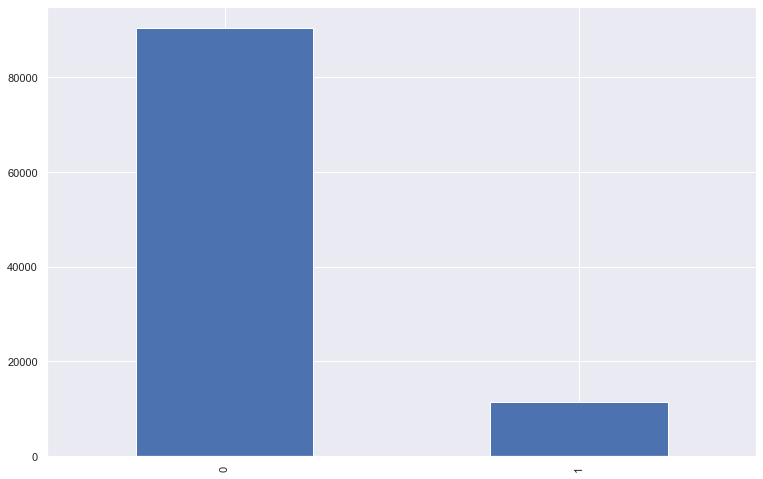

In [124]:
#We want to analyse how many were readmitted within 30 days and visualise it.
import matplotlib.pyplot as plt
import seaborn as sns

print(hospital.readmitted.value_counts())
hospital['readmitted'].value_counts().plot(kind='bar')

#### approx 10000 patients are readmitted in 30 days

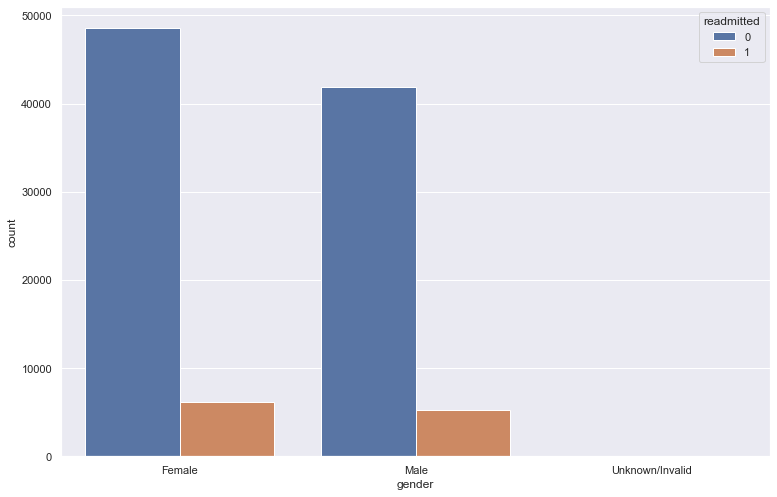

In [125]:
#Plot the graph of readmitted feature for each gender.
sns.countplot(x="gender", hue= "readmitted", data = hospital)
plt.show()


#### For readmitted within 30 days, Males and Females are almost equal in number.

In [126]:
#Count of total females and males
hospital['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

#### Total Female patients are more than male patients. 
#### Females are 53.7% of the total patients whereas Males are 46.23% of the total patients.

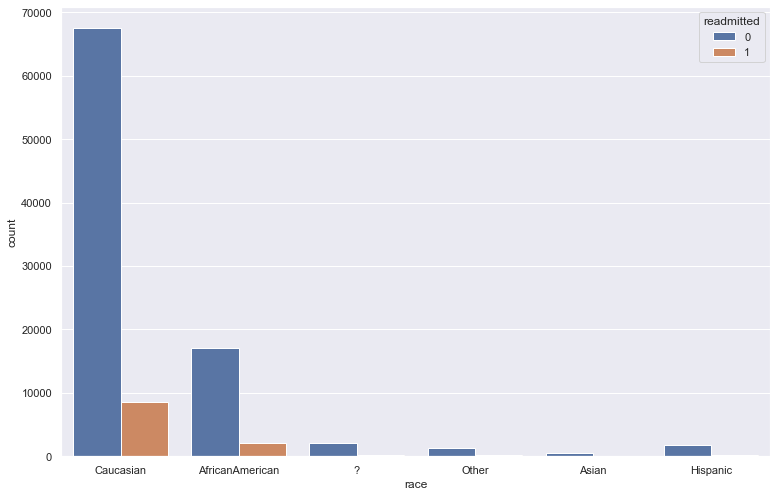

In [127]:
#plot the graph of count of readmitted attribute for each race category.
sns.countplot(x="race", hue= "readmitted", data = hospital)
sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.show()


#### Asian and Hispanic are very few and can be grouped into Other as they are very less in number.

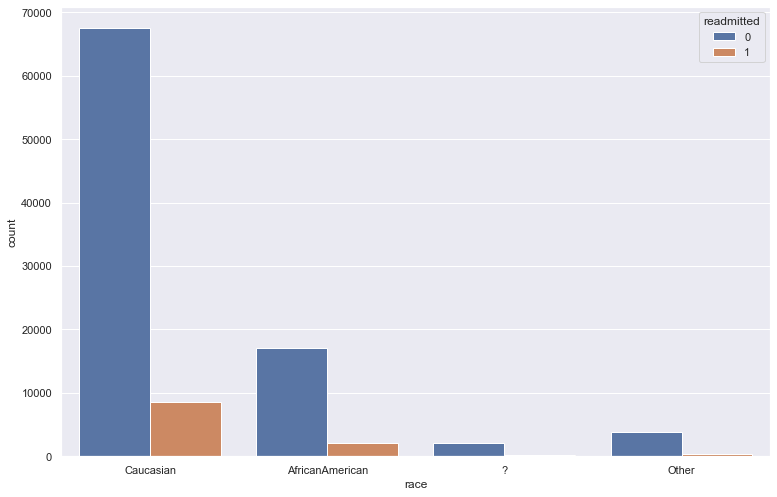

In [128]:
#Combining Asian and Hispanic into 'Other' as there are very less patients from those race.
map_race = {"Asian":"Other","Hispanic":"Other"}
hospital['race'] = hospital['race'].replace(map_race)

sns.countplot(x="race",  hue= "readmitted",data = hospital)
plt.show()

#### Majority of patients are Caucasian and it makes sense as the data is of the hospitals located in US.
#### Interestingly second highest are AfricanAmerican.

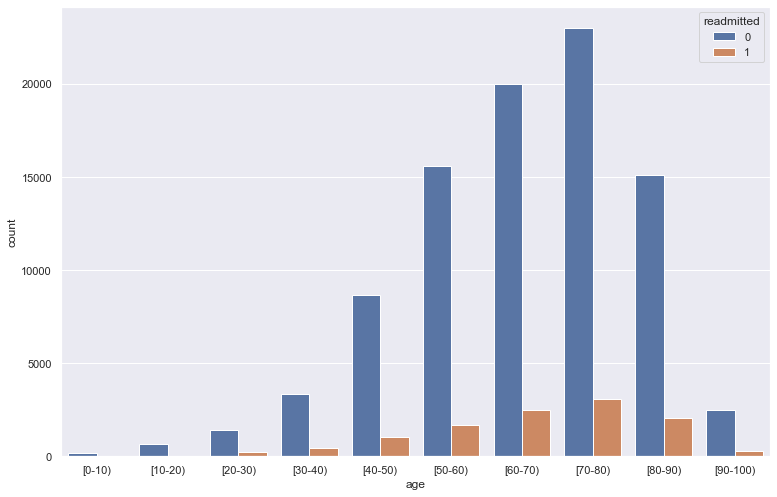

In [129]:
#plot the graph of count of readmitted for each age category range.
sns.countplot(x="age", hue= "readmitted", data = hospital)
plt.show()


#### Mostly patients with age >50 are readmitted. Majority are 70-80 age.

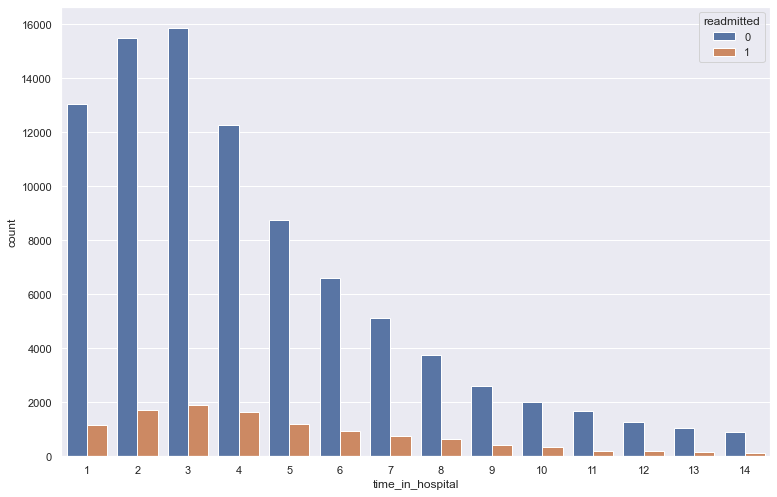

In [130]:
#plot the graph of count of readmitted for number of days of inpatient in hospital.
sns.countplot(x="time_in_hospital", hue= "readmitted", data = hospital)
plt.show()

#### Maximum patients stay for 2-4 days

In [131]:
#Count the number of patients assigned to each payer and find number of patients that are not assigned to any payer.
hospital['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

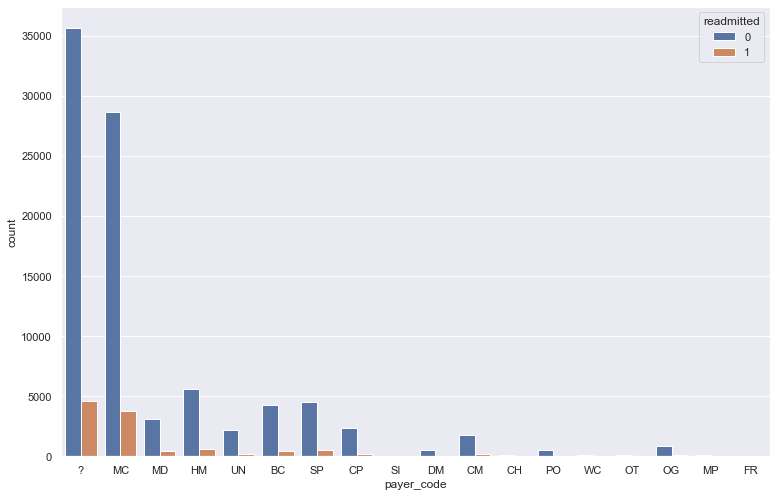

In [132]:
#plot the graph of count of readmitted patients relative to each payer.
sns.countplot(x="payer_code", hue= "readmitted", data = hospital)
plt.show()

#### Many payer_codes do not have any contribution in readmission. SI, DM, CH, PO, WC, OT, OG, MP, FR contribute very little so they can be added into Others.

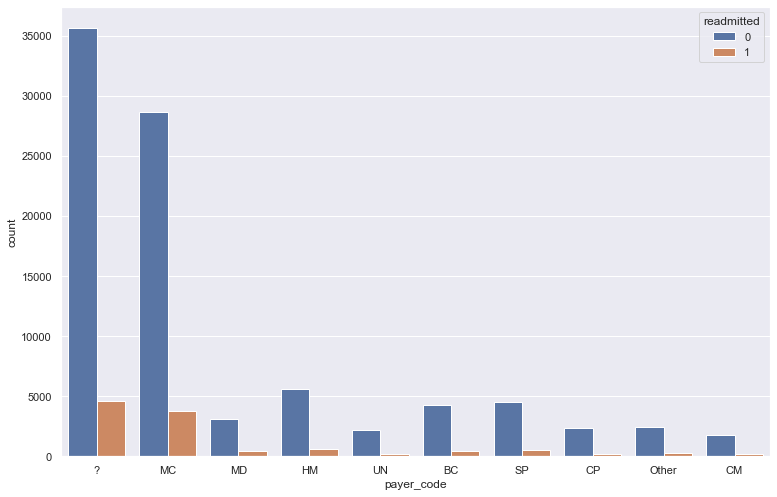

In [133]:
#payer_code: SI, DM, CH, PO, WC, OT, OG, MP, FR contribute very little so adding them all into Others.
#Hence, creating new code as 'Others' which consist of these codes.
map_code = {"SI":"Other","DM":"Other","CH":"Other","PO":"Other","WC":"Other","OT":"Other","OG":"Other","MP":"Other","FR":"Other" }
hospital['payer_code'] = hospital['payer_code'].replace(map_code)

sns.countplot(x="payer_code", hue= "readmitted", data = hospital)
plt.show()


#### You can notice that lot of data is missing i.e for 40256 patients. More than 50% of readmitted within 30 days are from unknown race(?). We can drop this feature.

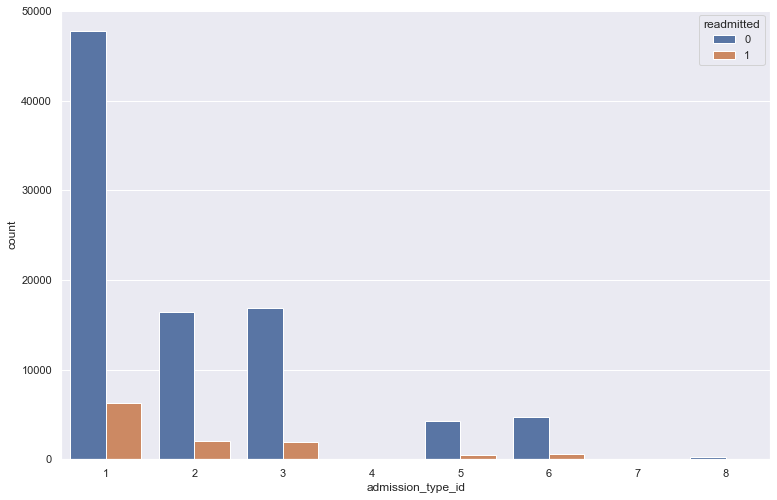

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [134]:
#plot the graph of count of readmitted patients relative to each payer.
sns.countplot(x="admission_type_id", hue= "readmitted", data = hospital)
plt.show()

hospital['admission_type_id'].value_counts()


#### Some of the addmission type ids mean the same, they can be clubbed together. Most of the readmitted patients are from Emergency admission type, so other admission types can be clubbed together .

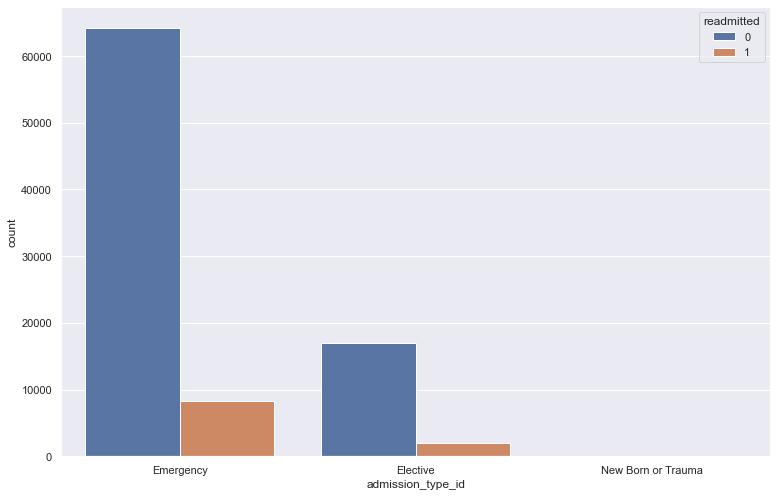

In [135]:
#Admission type 5,6,8 mean the same, 1,2 can also be clubbed.Since 4,7 admission type patients are very few they can also be combined.

map_adid = {1:"Emergency", 2:"Emergency",3:"Elective",4:"New Born or Trauma",5:np.nan,6:np.nan,7:"New Born or Trauma",8:np.nan}

hospital['admission_type_id'] = hospital['admission_type_id'].replace(map_adid)
sns.countplot(x="admission_type_id", hue= "readmitted", data = hospital)
plt.show()

In [136]:
#Count the number of patients assigned to each 'discharge_disposition_id'
hospital['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

#### Some of the disposition ids are assigned to very few patients. So, readmitted patients in them will be very few. So these ids can also be grouped together. Some similar meaning ids can also be grouped. This is done in preprocessing steps.

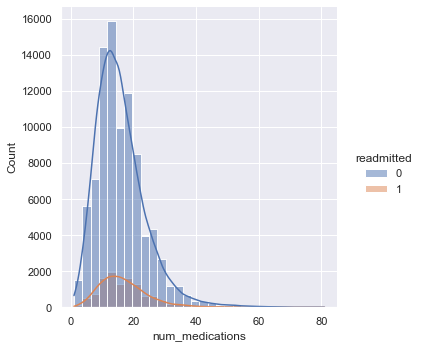

In [137]:
#To understand the range of number of medications given to patients who are readmitted and not readmitted.
ax=sns.displot(data=hospital,x='num_medications',bins=30,kde=True,hue='readmitted')

#### Number of medications given to patients readmitted within 30 days is in proportion with other patients. 7-21 medicines were given to most of the readmitted patients.
    

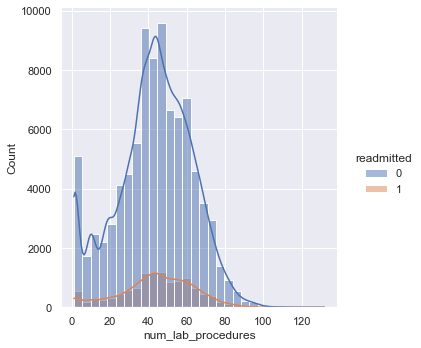

In [138]:
#To understand the range of number of lab_procedures done to patients who are readmitted and not readmitted.
ax=sns.displot(data=hospital,x='num_lab_procedures',bins=30,kde=True,hue='readmitted')

#### approx 35-65 lab procedures were done on patients who got readmitted. So they were in severe condition and hence required more tests. Later some of them got readmitted.

<AxesSubplot:xlabel='num_procedures', ylabel='count'>

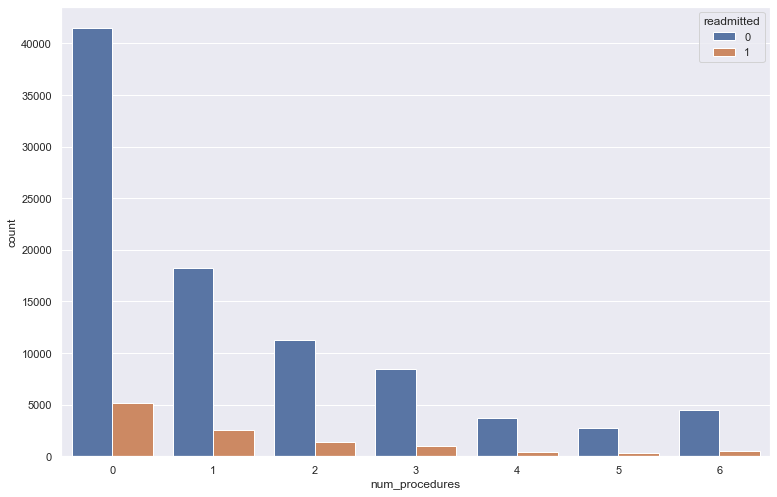

In [139]:
#To understand the number of procedures done to patients who are readmitted and not readmitted.
sns.countplot(x="num_procedures", hue= "readmitted", data = hospital)

#### 0 procedures were done on most of the readmitted patients. So, less procedures increase the chances of readmission.

### Feature Engineering- adding new column
#### To understand how many patients were readmitted in 30 days based on Number of times they had visited hospital in the preceding year. So, we add three column values 'number_outpatient', 'number_emergency','number_inpatient'.

<AxesSubplot:xlabel='patient_visit_beforeadmit', ylabel='count'>

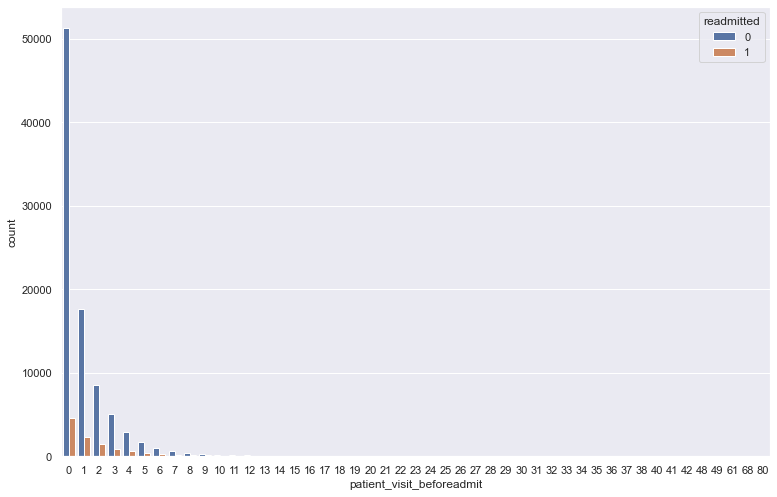

In [140]:
#create new column to store the number of times patient visited hospital in previous year
hospital['patient_visit_beforeadmit'] = hospital['number_outpatient'] + hospital['number_emergency'] + hospital['number_inpatient']
sns.countplot(x="patient_visit_beforeadmit", hue= "readmitted", data = hospital)

#### Maximum patients who were readmitted in 30 days did not visit the hospital before.

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

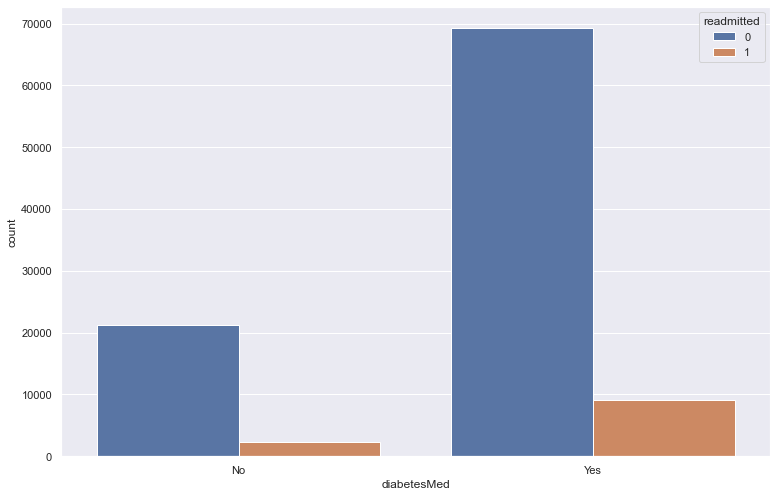

In [141]:
#To understand if diabetes meds were given to patients that are readmitted and not readmitted.
sns.countplot(x=hospital['diabetesMed'], hue = hospital['readmitted'])

#### Even after giving diabetes meds some of the patients got readmitted within 30 days. So, most of them were given 7-21 medicines. So, medicines should be increased .

<AxesSubplot:xlabel='max_glu_serum', ylabel='count'>

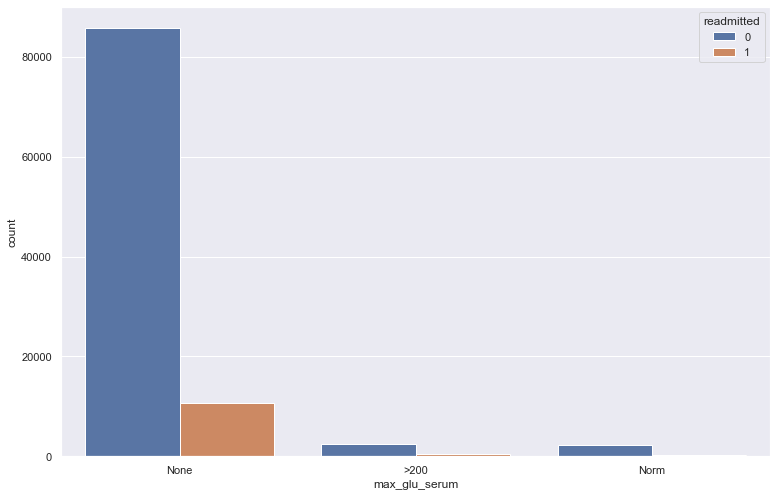

In [142]:
# In Glucose serum test result both >200 and >300 are not normal, so they can be grouped together.
map_serum = {">300":">200"}
hospital['max_glu_serum'] = hospital['max_glu_serum'].replace(map_serum)
#plotting the graph to check how many of them readmitted in 30 days.
sns.countplot(x = hospital['max_glu_serum'], hue = hospital['readmitted'])

#### Test was not measured for almost all readmitted patients. Test should have been done.

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

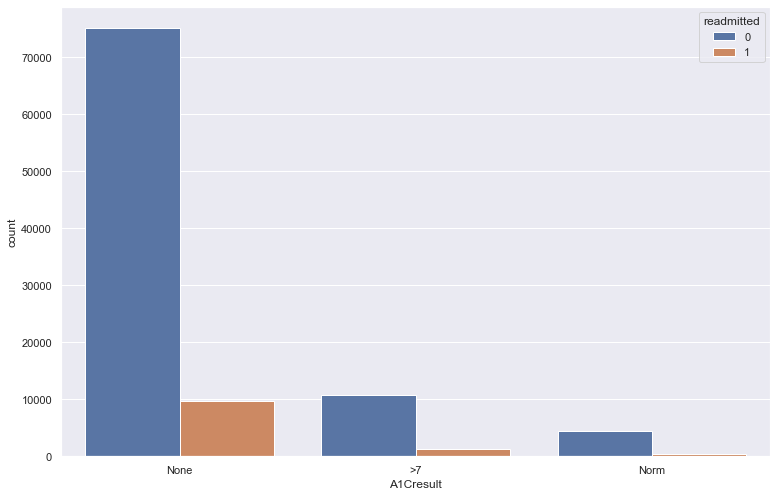

In [143]:
# In A1c test result both >7 and >8 are not normal, so they can be grouped together.
map_ac = {">8":">7"}
hospital['A1Cresult'] = hospital['A1Cresult'].replace(map_ac)
#plotting the graph to check how many of them readmitted in 30 days.
sns.countplot(x= hospital['A1Cresult'], hue = hospital['readmitted'])

#### Test was not measured for most readmitted patients. For some on which test was done their result was >7. 
#### Test should have been done. As readmitted patients have abnormal test results and hence they get sick again.

<AxesSubplot:xlabel='change', ylabel='count'>

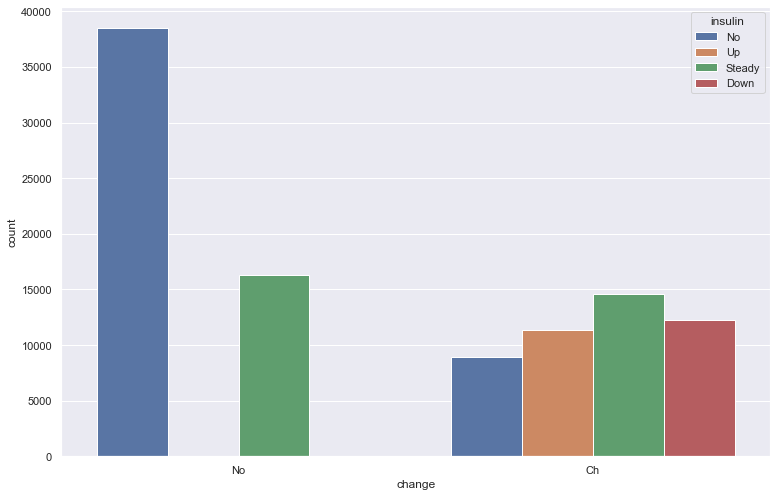

In [144]:
#Visualise how insulive level changes after there was change in medication.
sns.countplot(x=hospital['change'], hue = hospital['insulin'])

#### When medications are changed, dosage of insulin are changed the most. To visualise the change, we have this graph. Nearly for half of the patients (for whom the medication was changed) insulin level are incresed or decresed. 
From the dataframe we can see that dosage of other medications are not changed much. So we classify 'No' as 0 in them and 'Steady', 'Up', 'Down' as 1 in them.
But dosage of insulin has changed in many, it helps in predicting the readmitted patients so we keep the values as it is in this. Later we can one-hot encode this.

## Handling Missing Values

In [145]:
#Check the number of missing values ie'?' in features.
for i in hospital.columns:
    if hospital[i].dtype == object:
         print(i,hospital[i][hospital[i] == '?'].count())

race 2273
gender 0
age 0
weight 98569
admission_type_id 0
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


#### we notice that Weight,  Payer_Code and medical_speciality have maximum number of values missing.
#### Other than that, race, diag_1, diag_2, diag_3 also have some values missing.

In [146]:
#In gender there is a third type as Unknown/invalid which is as good as missing entry. Count them.
print('gender', hospital['gender'][hospital['gender'] == 'Unknown/Invalid'].count())   

gender 3


#### Hence we drop weight feature as it has maximum missing values and gender with missing row values.

In [147]:
#dropping column weight, Payer_Code and medical_speciality
hospital = hospital.drop(['weight','payer_code', 'medical_specialty'], axis = 'columns')

#dropping features that are not related to readmission of patients
hospital = hospital.drop(['encounter_id','patient_nbr'], axis = 'columns')

#dropping missing row values for gender.
hospital = hospital[hospital.gender != 'Unknown/Invalid']

In [148]:
#There are total 359 values in 'Diag2' out of which 30 are readmitted.
#There are total 1424 values in 'Diag3' out of which 92 are readmitted.
#Hence deleting missing value rows.
hospital = hospital[hospital.diag_1 != '?']
hospital = hospital[hospital.diag_2 != '?']
hospital = hospital[hospital.diag_3 != '?']

#There are total 2274 unknown Races out of which 189 are readmitted.
#deleting missing value rows.
hospital = hospital[hospital.race != '?']

In [149]:
#checking missing values
for i in hospital.columns:
    if hospital[i].dtype == object:
         print(i,hospital[i][hospital[i] == '?'].count())

race 0
gender 0
age 0
admission_type_id 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


In [150]:
#For each column in keys find the count values in it.
keys = ['citoglipton', 'examide','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for i in keys:
    print(hospital[i].value_counts())

No    98052
Name: citoglipton, dtype: int64
No    98052
Name: examide, dtype: int64
No        78807
Steady    17677
Up         1017
Down        551
Name: metformin, dtype: int64
No        96529
Steady     1371
Up          107
Down         45
Name: repaglinide, dtype: int64
No        97361
Steady      657
Up           23
Down         11
Name: nateglinide, dtype: int64
No        97969
Steady       76
Up            6
Down          1
Name: chlorpropamide, dtype: int64
No        93065
Steady     4488
Up          315
Down        184
Name: glimepiride, dtype: int64
No        85769
Steady    10990
Up          752
Down        541
Name: glipizide, dtype: int64
No        87791
Steady     8932
Up          791
Down        538
Name: glyburide, dtype: int64
No        90955
Steady     6755
Up          227
Down        115
Name: pioglitazone, dtype: int64
No        91886
Steady     5908
Up          174
Down         84
Name: rosiglitazone, dtype: int64
No        97753
Steady      286
Up           10
Down

#### We can observe that 'citoglipton', 'examide' have all the values as 'No'.
#### We also observe that 'acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide', 'miglitol', 'chlorpropamide' have majority of values as 'No' and very few patients are in Steady, Up and Down category (approx 0.1% of total patients).
#### We can drop these features.

In [151]:
drop_feature= [ 'citoglipton', 'examide', 'acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide', 'miglitol', 'chlorpropamide']
for i in drop_feature:
    hospital = hospital.drop([i], axis = 'columns')

In [152]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   race                       98052 non-null  object
 1   gender                     98052 non-null  object
 2   age                        98052 non-null  object
 3   admission_type_id          87944 non-null  object
 4   discharge_disposition_id   98052 non-null  int64 
 5   admission_source_id        98052 non-null  int64 
 6   time_in_hospital           98052 non-null  int64 
 7   num_lab_procedures         98052 non-null  int64 
 8   num_procedures             98052 non-null  int64 
 9   num_medications            98052 non-null  int64 
 10  number_outpatient          98052 non-null  int64 
 11  number_emergency           98052 non-null  int64 
 12  number_inpatient           98052 non-null  int64 
 13  diag_1                     98052 non-null  object
 14  diag_

In [153]:
#Replacing String values with 0s and 1s.
hospital['change'] = hospital['change'].replace({"Ch": 1,"No":0})
hospital['gender'] = hospital['gender'].replace({"Male":1, "Female":0})
hospital['diabetesMed'] = hospital['diabetesMed'].replace({"Yes":1, "No":0})

In [154]:
#Clubbing similar meaning disposition types.
map_dis = {6:1, 8:1,13:1,3:2,4:2,5:2,14:2,22:2,23:2,24:2,15:2,30:2,27:2,28:2,29:2,25:18,26:28, 19:11, 20:11, 21:11,16:12,17:12}
hospital['discharge_disposition_id'] = hospital['discharge_disposition_id'].replace(map_dis)
hospital['discharge_disposition_id'].value_counts()

1     70737
2     20487
18     4565
11     1616
7       592
12       28
9        21
10        6
Name: discharge_disposition_id, dtype: int64

In [155]:
#Clubbing similar meaning admission sources.
map_ad = {2:1,3:1,5:4,6:4,10:4,15:9,17:9,20:9,21:9,18:4,22:4,25:4,26:4}
hospital['admission_source_id'] = hospital['admission_source_id'].replace(map_ad)
hospital['admission_source_id'].value_counts()

7     55951
1     29565
9      6811
4      5705
8        15
14        2
11        2
13        1
Name: admission_source_id, dtype: int64

In [156]:
#Mapping 'No' in medications to 0 and 'Steady','Up','Down' to 1 except Insulin as distribution of categories in insulin is like even.
meds = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'glyburide-metformin']
map_change = {"No":0,"Steady":1,"Up":1,"Down":1}
for col in meds:
    hospital[col] = hospital[col].replace(map_change)

### Feature Engineering- adding new column
#### To understand how many medications were changed for the patients that readmitted in 30 days, we create a new column that add the values of column in 'meds' list.

<AxesSubplot:xlabel='num_medschange', ylabel='count'>

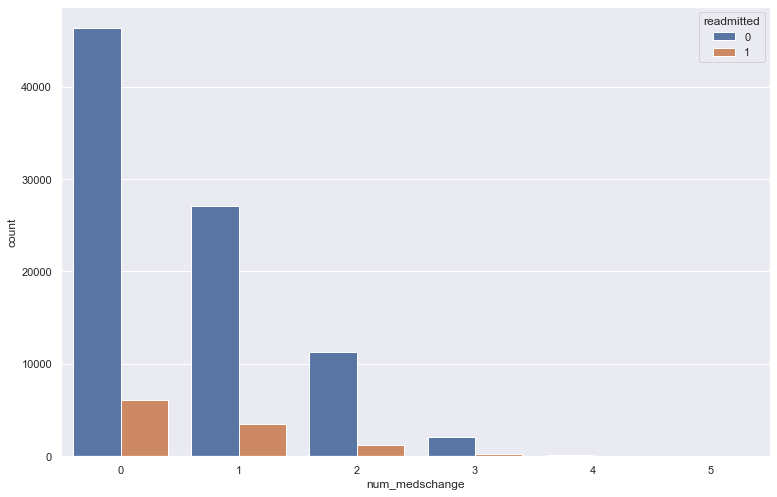

In [157]:
#creating a new column to store the total number of medications changed for a patient.
hospital['num_medschange'] = 0
for col in meds:
    hospital['num_medschange'] = hospital['num_medschange'] + hospital[col]

#Visualise the number of patients readmitted within 30 days for each number of changes in medications.
sns.countplot(x= hospital['num_medschange'], hue = hospital['readmitted'])

#### For 85% of patients medications changed were <=1.  Patients who readmitted within 30 days, 90% of them had <=1 medications changed.

In [158]:
#Grouping together codes which mean the same and assigning a category to them.
diagnosis = ['diag_1','diag_2','diag_3']

def assigncategory(code):
    if code>=240 and code<=279:
        val = 'Endocrine'
    elif code>=280 and code<=289 or code>=390 and code<=459 or code==785:
        val = 'Circulatory'
    elif code>=460 and code<=519 or code==786:
        val = 'Respiratory'
    elif code>=710 and code<=739 or code>=320 and code<=389:
        val = 'Musculoskeletal'
    elif code>=520 and code<=579 or code==787:
        val = 'Digestive'
    elif code==250:
        val = 'Diabetes'
    elif code>=580 and code<=629 or code==788:
        val = 'Genitourinary'
    elif code>=680 and code<=709 or code==782:
        val = 'Skin'
    else :
        val = 'Other'

    return val

#codes that start with E or V are first made -1 and then assigned 'Other' category.
for col in diagnosis:
    hospital.loc[(hospital[col].str.contains("V")) | (hospital[col].str.contains("E")), col] = -1
    hospital[col] = hospital[col].astype(np.float16)
    hospital[col] = hospital[col].apply(assigncategory)
    

In [159]:
#Correlation table
corr = round(hospital.corr(),4)
corr

,gender,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glyburide,pioglitazone,rosiglitazone,acarbose,glyburide-metformin,change,diabetesMed,readmitted,patient_visit_beforeadmit,num_medschange
gender,1.0000,-0.0002,-0.0098,-0.0290,-0.0024,0.0613,-0.0221,-0.0118,-0.0205,-0.0139,...,0.0325,0.0044,0.0133,0.0127,0.0033,0.0150,0.0157,-0.0025,-0.0225,0.0303
discharge_disposition_id,-0.0002,1.0000,0.0139,0.0688,0.0169,0.0252,0.0146,-0.0403,-0.0326,0.0024,...,0.0615,-0.0313,-0.0138,0.0049,-0.0194,-0.0659,-0.0692,-0.0013,-0.0342,-0.0290
admission_source_id,-0.0098,0.0139,1.0000,-0.0001,0.1585,-0.1907,-0.0954,0.0063,0.0701,0.0612,...,-0.0047,-0.0154,-0.0230,0.0000,-0.0164,0.0054,-0.0009,0.0124,0.0656,-0.0398
time_in_hospital,-0.0290,0.0688,-0.0001,1.0000,0.3186,0.1912,0.4642,-0.0109,-0.0105,0.0723,...,0.0237,0.0037,0.0048,0.0060,-0.0010,0.1084,0.0623,0.0434,0.0294,0.0229
num_lab_procedures,-0.0024,0.0169,0.1585,0.3186,1.0000,0.0587,0.2679,-0.0086,-0.0021,0.0392,...,-0.0016,-0.0143,-0.0092,0.0001,-0.0096,0.0629,0.0319,0.0199,0.0159,-0.0265
num_procedures,0.0613,0.0252,-0.1907,0.1912,0.0587,1.0000,0.3830,-0.0265,-0.0387,-0.0675,...,0.0053,0.0128,0.0128,-0.0020,-0.0017,0.0046,-0.0047,-0.0125,-0.0675,-0.0068
num_medications,-0.0221,0.0146,-0.0954,0.4642,0.2679,0.3830,1.0000,0.0427,0.0121,0.0629,...,0.0364,0.0665,0.0518,0.0187,0.0092,0.2465,0.1893,0.0378,0.0631,0.1275
number_outpatient,-0.0118,-0.0403,0.0063,-0.0109,-0.0086,-0.0265,0.0427,1.0000,0.0910,0.1060,...,-0.0037,0.0122,-0.0030,0.0127,-0.0069,0.0243,0.0172,0.0184,0.6497,-0.0039
number_emergency,-0.0205,-0.0326,0.0701,-0.0105,-0.0021,-0.0387,0.0121,0.0910,1.0000,0.2672,...,-0.0298,0.0012,-0.0093,0.0009,0.0023,0.0386,0.0263,0.0606,0.6045,-0.0186
number_inpatient,-0.0139,0.0024,0.0612,0.0723,0.0392,-0.0675,0.0629,0.1060,0.2672,1.0000,...,-0.0394,-0.0268,-0.0214,0.0024,-0.0115,0.0230,0.0268,0.1638,0.7167,-0.0789


<AxesSubplot:>

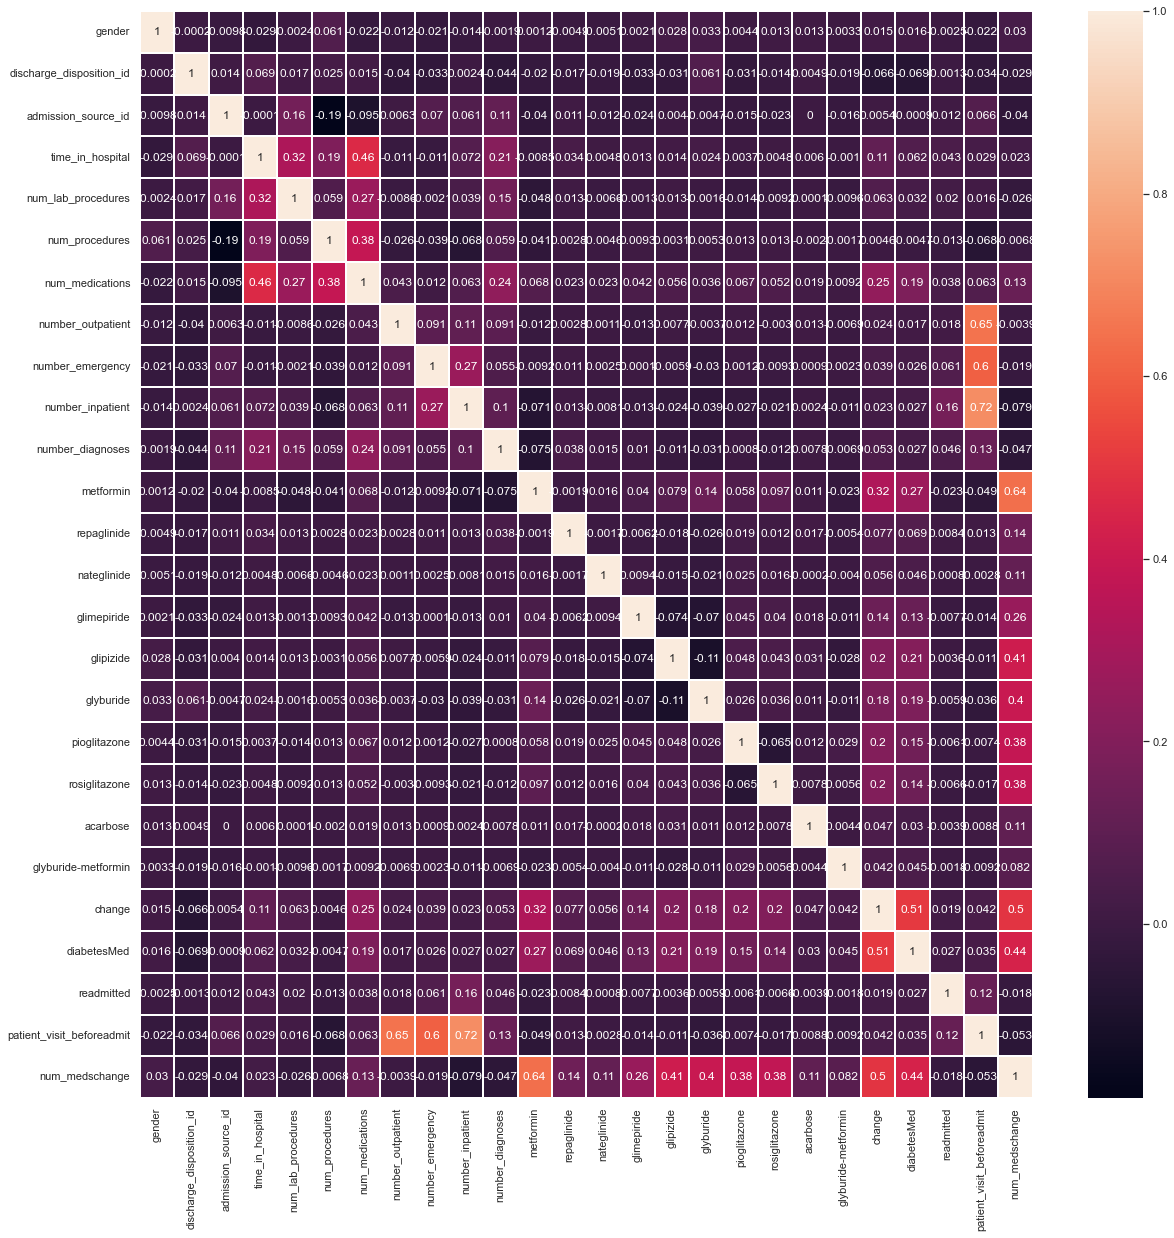

In [160]:
#potting heat map of correlation for better visualisation
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot=True, linewidths=2)


#### We can see that number of medicies and time in hospital are correlated as medicines increase with time in hospital, diabetes medicines and change are also correlated. Features are not strongly correlated to other features. Many features are not correlated which is a good thing then we can have variety of uncorrelated features which our model can learn.

## Function with all the steps for handling missing values and deleting unwanted columns
## Overall Preprocessing

In [161]:
def handle_missing_values(hospital):
    
    #We have to do predictive analysis of early readmission. So we create 2 classes
    #one for <30 days readmission and second for >30 days and no- readmission.
    #Next we replace '<30' in readmitted column with 1 and '>30', 'NO' with 0 (because we consider them as one class). 

    hospital['readmitted'] = hospital['readmitted'].replace({"NO":0,"<30":1,">30":0})
 
    
    #Combining Asian and Hispanic into 'Other' as there are very less patients from those race so they dont affect much in training model.
    map_race = {"Asian":"Other","Hispanic":"Other"}
    hospital['race'] = hospital['race'].replace(map_race)
    
    #payer_code: SI, DM, CH, PO, WC, OT, OG, MP, FR contribute very little so adding them all into Others.
    #Hence, creating new code as 'Others' which consist of these codes.
    map_code = {"SI":"Other","DM":"Other","CH":"Other","PO":"Other","WC":"Other","OT":"Other","OG":"Other","MP":"Other","FR":"Other" }
    hospital['payer_code'] = hospital['payer_code'].replace(map_code)
    
    #Admission type 5,6,8 mean the same, 1,2 can also be clubbed.Since 4,7 admission type patients are very few they can also be combined.
    map_adid = {1:"Emergency", 2:"Emergency",3:"Elective",4:"New Born or Trauma",5:np.nan,6:np.nan,7:"New Born or Trauma",8:np.nan}
    hospital['admission_type_id'] = hospital['admission_type_id'].replace(map_adid)
    
    #create new column to store the number of times patient visited hospital in previous year
    hospital['patient_visit_beforeadmit'] = hospital['number_outpatient'] + hospital['number_emergency'] + hospital['number_inpatient']

    map_serum = {">300":">200"}
    hospital['max_glu_serum'] = hospital['max_glu_serum'].replace(map_serum)
    
    map_ac = {">8":">7"}
    hospital['A1Cresult'] = hospital['A1Cresult'].replace(map_ac)
    
    #dropping column weight, Payer_Code and medical_speciality
    hospital = hospital.drop(['weight','payer_code', 'medical_specialty'], axis = 'columns')

    #dropping features that are not related to readmission of patients
    hospital = hospital.drop(['encounter_id','patient_nbr'], axis = 'columns')

    #dropping missing row values for gender.
    hospital = hospital[hospital.gender != 'Unknown/Invalid']
    
    #There are total 359 values in 'Diag2' out of which 30 are readmitted.
    #There are total 1424 values in 'Diag3' out of which 92 are readmitted.
    #Hence deleting missing value rows.
    hospital = hospital[hospital.diag_1 != '?']
    hospital = hospital[hospital.diag_2 != '?']
    hospital = hospital[hospital.diag_3 != '?']

    #There are total 2274 unknown Races out of which 189 are readmitted.
    #deleting missing value rows.
    hospital = hospital[hospital.race != '?']
    
    drop_feature= [ 'citoglipton', 'examide', 'acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide', 'miglitol', 'chlorpropamide']
    for i in drop_feature:
        hospital = hospital.drop([i], axis = 'columns')
    
    #Replacing String values with 0s and 1s.
    hospital['change'] = hospital['change'].replace({"Ch": 1,"No":0})
    hospital['gender'] = hospital['gender'].replace({"Male":1, "Female":0})
    hospital['diabetesMed'] = hospital['diabetesMed'].replace({"Yes":1, "No":0})
    
    #Clubbing similar meaning disposition types.
    map_dis = {6:1, 8:1,13:1,3:2,4:2,5:2,14:2,22:2,23:2,24:2,15:2,30:2,27:2,28:2,29:2,25:18,26:28, 19:11, 20:11, 21:11,16:12,17:12}
    hospital['discharge_disposition_id'] = hospital['discharge_disposition_id'].replace(map_dis)
    hospital['discharge_disposition_id'].value_counts()
    
    #Clubbing similar meaning admission sources.
    map_ad = {2:1,3:1,5:4,6:4,10:4,15:9,17:9,20:9,21:9,18:4,22:4,25:4,26:4,11:4,14:4,13:4}
    hospital['admission_source_id'] = hospital['admission_source_id'].replace(map_ad)
    hospital['admission_source_id'].value_counts()
    
    #Mapping 'No' in medications to 0 and 'Steady','Up','Down' to 1 except Insulin as distribution of categories in insulin is like even.
    meds = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'glyburide-metformin']
    map_change = {"No":0,"Steady":1,"Up":1,"Down":1}
    for col in meds:
        hospital[col] = hospital[col].replace(map_change)
        
    #creating a new column to store the total number of medications changed for a patient.
    hospital['num_medschange'] = 0
    for col in meds:
        hospital['num_medschange'] = hospital['num_medschange'] + hospital[col]
        
    diagnosis = ['diag_1','diag_2','diag_3']

    def assigncategory(code):
        if code>=240 and code<=279:
            val = 'Endocrine'
        elif code>=280 and code<=289 or code>=390 and code<=459 or code==785:
            val = 'Circulatory'
        elif code>=460 and code<=519 or code==786:
            val = 'Respiratory'
        elif code>=710 and code<=739 or code>=320 and code<=389:
            val = 'Musculoskeletal'
        elif code>=520 and code<=579 or code==787:
            val = 'Digestive'
        elif code==250:
            val = 'Diabetes'
        elif code>=580 and code<=629 or code==788:
            val = 'Genitourinary'
        elif code>=680 and code<=709 or code==782:
            val = 'Skin'
        else :
            val = 'Other'

        return val


    for col in diagnosis:
        hospital.loc[(hospital[col].str.contains("V")) | (hospital[col].str.contains("E")), col] = -1
        hospital[col] = hospital[col].astype(np.float16)
        hospital[col] = hospital[col].apply(assigncategory)
   
    return hospital

### Function to perform one hot encoding and feature scaling

In [162]:
def one_hot_encode_scaling(hospital):
    # creating list of categorical columns
    cat_cols = ['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed']
    
    # converting these columns to object datatype
    hospital[cat_cols] = hospital[cat_cols].astype(str)
    
    # creating columns with numeric datatype
    num_cols = ['time_in_hospital',
           'num_lab_procedures', 'num_procedures', 'num_medications',
           'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'patient_visit_beforeadmit','num_medschange']
    
    # Converting these columns to int
    hospital[num_cols] = hospital[num_cols].astype(int)
    
    # creating columns with boolean datatype
    bool_cols = [cname for cname in cat_cols if 
                                hospital[cname].nunique() == 2 and
                                hospital[cname].dtype == "object"]
   
    # converting these columns in bool
    hospital_bool = hospital[bool_cols].astype(int)
    
    # performing onehot encoding
    hospital_one_hot = pd.concat([pd.get_dummies(hospital.loc[:, hospital.dtypes == object]), hospital_bool], axis=1)
    
    
    
    # scaling all the numeric columns
    from sklearn import preprocessing

    x = hospital[num_cols].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    hospital_scaled = pd.DataFrame(x_scaled,columns=num_cols)
    
    # Concat one hot data with scaled data
    hospital_final = pd.concat([hospital_one_hot.reset_index(drop=True),hospital_scaled],axis=1)
    
    return hospital_final

### Creating Train and Test data

In [163]:
# reading the training data
train_data = pd.read_csv("diabetic_data_train.csv")
hospital_comp = handle_missing_values(train_data)
y_train = hospital_comp['readmitted']
X_train = one_hot_encode_scaling(hospital_comp)
X_train.head()

,race_AfricanAmerican,race_Caucasian,race_Other,gender_0,gender_1,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,patient_visit_beforeadmit,num_medschange
0,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.404580,1.000000,0.0875,0.000000,0.0,0.0,0.230769,0.0000,0.0
1,0,1,0,0,1,0,0,0,0,0,...,0.230769,0.381679,0.166667,0.2250,0.000000,0.0,0.0,0.076923,0.0000,0.6
2,1,0,0,0,1,0,0,0,0,1,...,0.076923,0.114504,0.000000,0.0750,0.000000,0.0,0.0,0.153846,0.0000,0.0
3,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.480916,0.000000,0.0250,0.000000,0.0,0.0,0.153846,0.0000,0.0
4,0,1,0,0,1,0,0,0,0,0,...,0.076923,0.381679,0.000000,0.1625,0.166667,0.0,0.0,0.461538,0.0875,0.2


In [164]:
# reading the test data
test_data = pd.read_csv("diabetic_data_test.csv")
hospital_comp = handle_missing_values(test_data)
y_test = hospital_comp['readmitted']
X_test = one_hot_encode_scaling(hospital_comp)

# Creating Baseline models
### We are staring with logistic regression for its good interpretebility.
### Since we have a lot of features, we are using regularized logistic regression weaken those features who do not contribute much towards predictions.

In [165]:
#Applying Logistic Regression for different coefficients.
from sklearn.linear_model import LogisticRegression
#Evaluating on different beta values
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))

C: 10
Training accuracy: 0.8869377150863066
Test accuracy: 0.8867332382310984
C: 1
Training accuracy: 0.8869105104941715
Test accuracy: 0.8868962706337885
C: 0.1
Training accuracy: 0.8868969081981039
Test accuracy: 0.8871408192378235
C: 0.001
Training accuracy: 0.8870873403430499
Test accuracy: 0.8873038516405135


### Keeping value of regularized coef as 0.1

In [166]:
#Keeping coefficient as 0.1
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)
print('C: 0.1')
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

C: 0.1
Training accuracy: 0.8868969081981039
Test accuracy: 0.8871408192378235



In [167]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

#method to create confusion matrix
def createConfusionMatrix(X_val,y_val,clf):
    y_pred = clf.predict(X_val)
    cnf_matrix = confusion_matrix(y_val, y_pred)
    print(cnf_matrix)
    cnfm_display = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix, display_labels = ['1','0'])

    cnfm_display.plot()
    plt.show()
    tpr = (cnf_matrix[0][0])/(cnf_matrix[0][0]+cnf_matrix[0][1])
    fpr = (cnf_matrix[1][0])/(cnf_matrix[1][0]+cnf_matrix[1][1])
    tnr = (cnf_matrix[1][1])/(cnf_matrix[1][1]+cnf_matrix[1][0])
    fnr = (cnf_matrix[0][1])/(cnf_matrix[0][1]+cnf_matrix[0][0])
    print("TPR: ",tpr)
    print("FPR: ",fpr)
    print("TNR: ",tnr)
    print("FNR: ",fnr)
    # Print performance measures
    print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("precision: ",precision_score(y_test, y_pred, average="macro"))
    print("Recall: ",recall_score(y_test, y_pred, average="macro"))
    print(classification_report(y_test, y_pred, target_names= ['1','0']))

[[21726    44]
 [ 2725    40]]


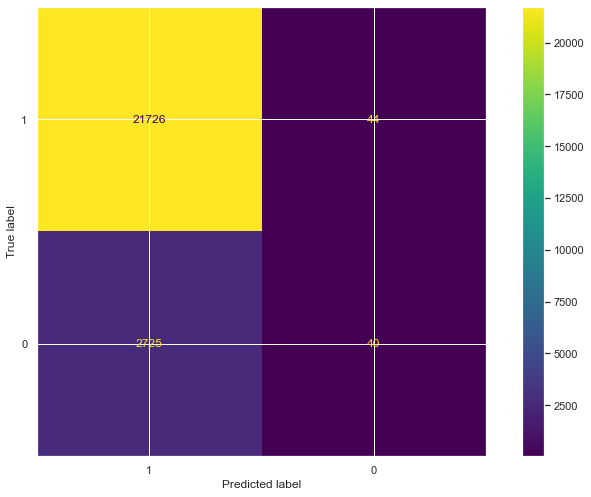

TPR:  0.9979788700045935
FPR:  0.9855334538878843
TNR:  0.014466546112115732
FNR:  0.002021129995406523
Accuracy is 0.89
precision:  0.6823715458127139
Recall:  0.5062227080583547
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     21770
           0       0.48      0.01      0.03      2765

    accuracy                           0.89     24535
   macro avg       0.68      0.51      0.48     24535
weighted avg       0.84      0.89      0.84     24535



In [168]:
#Create confusion matrix for the trained Logistic regression model using test data and print performance measures.
createConfusionMatrix(X_test,y_test,clf)

### Readmitted within 30 days is our positive class. Hence we want to decrease the False Positive Rate and increase the True Negative Rate in our next improved model. Precision and Recall are low.

In [169]:
import matplotlib.pyplot as plt

# Method for Plotting ROC curve.
def plotROCcurve(clf,X_test,y_test):
    #Considering class 1 as positive, I have put 'pos_label' as 1.
    y_pred_prob = clf.predict_proba(X_test)[::,1]
    #Plotting ROC curve.
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.figure(figsize=(11,7))
    plt.plot(fpr,tpr,label="data, auc="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    

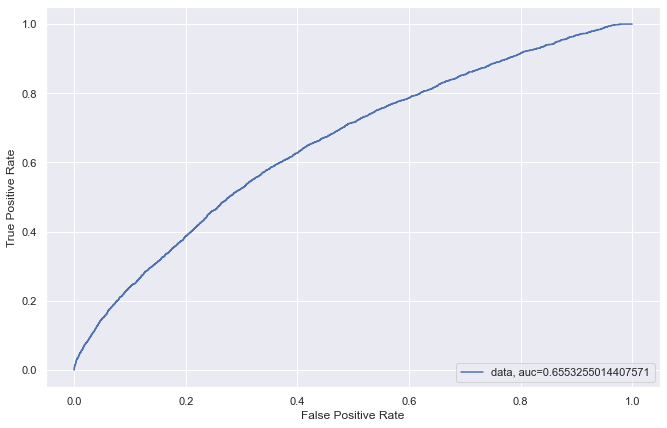

In [170]:
#Plotting ROC curve.
plotROCcurve(clf,X_test,y_test)

### This represents class imbalance problem. Auc value is too less.

In [171]:
#Created method to find important features with new model.
#Creating plot for feature importance.
def plotimpFeature(most_imp_features, model):
    most_imp_features.sort_values(by="Importance", inplace=True)
    #print(most_imp_features)
    plt.figure(figsize=(10,6))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
    plt.xlabel('Importance')
    plt.title(model)
    plt.show()

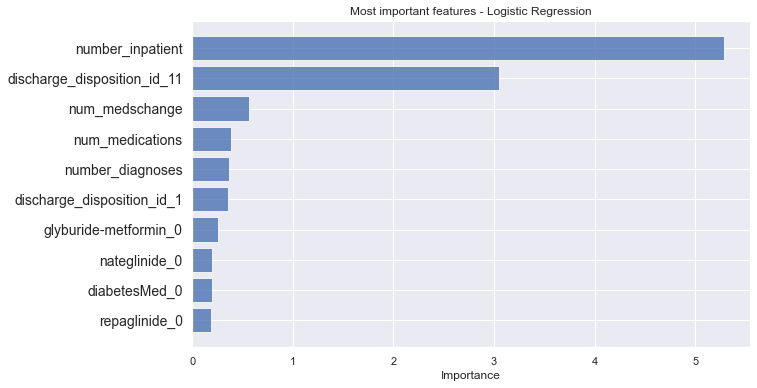

In [172]:
#Creating plot for feature importance.
most_imp_features = pd.DataFrame([f for f in zip(X_train.columns,map(abs,clf.coef_[0]))], columns=["Feature", "Importance"]).nlargest(10, "Importance")
plotimpFeature(most_imp_features,'Most important features - Logistic Regression' )

#### Features like 'number_inpatient' and 'discharge_disposition_id_11' are the most important features in our analysis.
#### 'discharge_disposition_id_11' means these patients were discharged because they unfortunately expired.
#### 'num_medschange' and 'num_diagnoses' are the next two important features. 'num_medschange' is created by us in feature engineering.
#### There is a problem of class imbalance in the test and train dataset. This will create problems with class accuracies. Accuracy of majority class will always be too high and accuracy of minority class will be too low.
#### We have used Synthetic Minortity Oversampling Technique(SMOTE) to overcome this problem.

In [173]:
#Solving the class imbalance problem by using SMOTE
X = pd.concat([X_train,X_test],axis=0)
y = pd.concat([y_train,y_test],axis=0)

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

print('Original dataset shape {}'.format(Counter(y)))

smt = SMOTE(random_state=20)
#new data
train_input_new, train_output_new = smt.fit_resample(X, y)

print('New dataset shape {}'.format(Counter(train_output_new)))
#Splitting test, train data
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
#splitting new data into test and train
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 86986, 1: 11066})
New dataset shape Counter({0: 86986, 1: 86986})


In [174]:
#Applying Logistic Regression after solving class imbalance problem through SMOTE.
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)
print('C: 0.1')
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

C: 0.1
Training accuracy: 0.9224656372820221
Test accuracy: 0.9211955740767351



c:\users\puppa\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[17122    70]
 [ 2672 14931]]


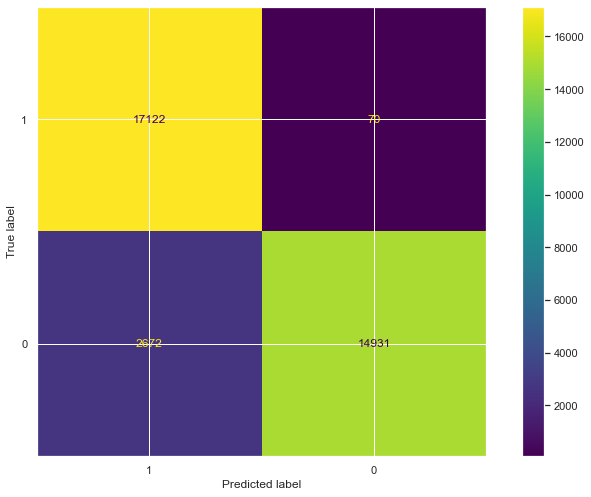

TPR:  0.995928338762215
FPR:  0.15179230812929614
TNR:  0.8482076918707039
FNR:  0.004071661237785016
Accuracy is 0.92
precision:  0.9301716216460245
Recall:  0.9220680153164594
              precision    recall  f1-score   support

           1       0.87      1.00      0.93     17192
           0       1.00      0.85      0.92     17603

    accuracy                           0.92     34795
   macro avg       0.93      0.92      0.92     34795
weighted avg       0.93      0.92      0.92     34795



In [175]:
#create confusion matrix  and print performance measures.
y_pred = clf.predict(X_test)
createConfusionMatrix(X_test,y_test,clf)

#### Our TPR and TNR are now better than the previous model. TNR was close to zero in our previous model in which data was imbalanced. TNR now has improved to 0.84.

#### Both Precision and Recall are good. so, model is predicting correctly.

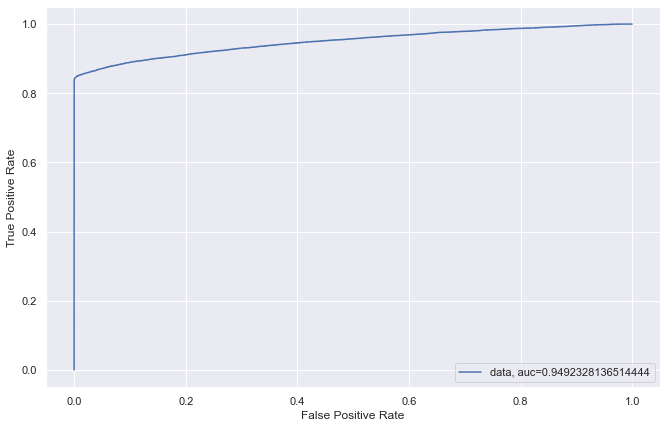

In [176]:
#Plotting ROC curve.
plotROCcurve(clf,X_test,y_test)

#### AUC is 0.94 which is good for our model.

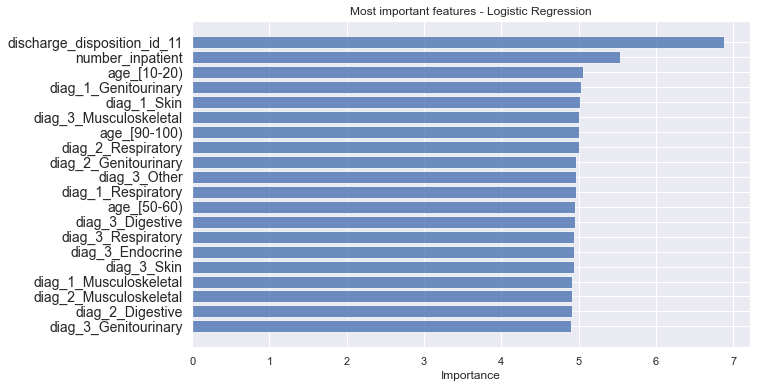

In [177]:
#Finding important features with new model.
most_imp_features = pd.DataFrame([f for f in zip(X_train.columns,map(abs,clf.coef_[0]))], columns=["Feature", "Importance"]).nlargest(20, "Importance")
plotimpFeature(most_imp_features,"Most important features - Logistic Regression")

### 'number_inpatient' and 'discharge_disposition_id_11'  are again the most important feature in the model. Apart from these two, features extraced from diagnosis code 1,2 3 are also very important for our prediction. We could see this insight because we increased the minority samples in our dataset.

### Decision tree

In [178]:
from sklearn.tree import DecisionTreeClassifier

#creating decision tree model
dt = DecisionTreeClassifier(criterion = "entropy", min_samples_split=30)
dt.fit(X_train, y_train)
#finding predicted y data
y_pred = dt.predict(X_test)
print('Training accuracy:', dt.score(X_train, y_train))
print('Test accuracy:', dt.score(X_test, y_test))

Training accuracy: 0.9403996349971618
Test accuracy: 0.9003305072567898


#### Accuracy and precision are good so model is well trained and predicting correctly.

[[16010  1182]
 [ 2286 15317]]


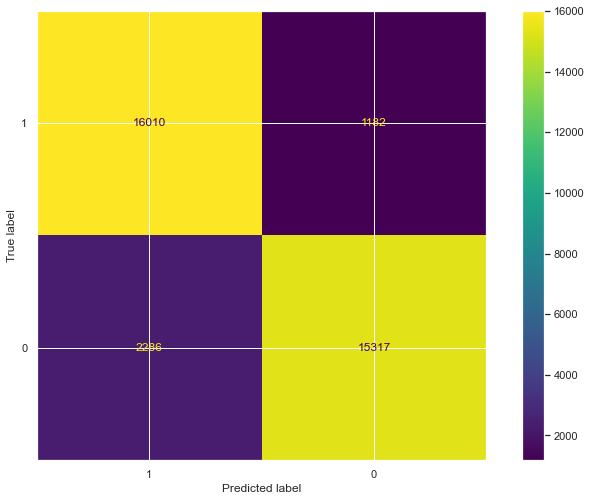

TPR:  0.9312470916705444
FPR:  0.1298642276884622
TNR:  0.8701357723115378
FNR:  0.06875290832945556
Accuracy is 0.90
precision:  0.901706975629136
Recall:  0.9006914319910411
              precision    recall  f1-score   support

           1       0.88      0.93      0.90     17192
           0       0.93      0.87      0.90     17603

    accuracy                           0.90     34795
   macro avg       0.90      0.90      0.90     34795
weighted avg       0.90      0.90      0.90     34795



In [179]:
#create confusion matrix  and print performance measures.
createConfusionMatrix(X_test,y_test,dt)

#### Our FPR and TNR are now better than the previous model. TNR now has improved to 0.86 and FPR decreased to 0.13.
#### But, TPR has decreased that previous model and FNR is increased to 0.068. So, lets try another type of model. 


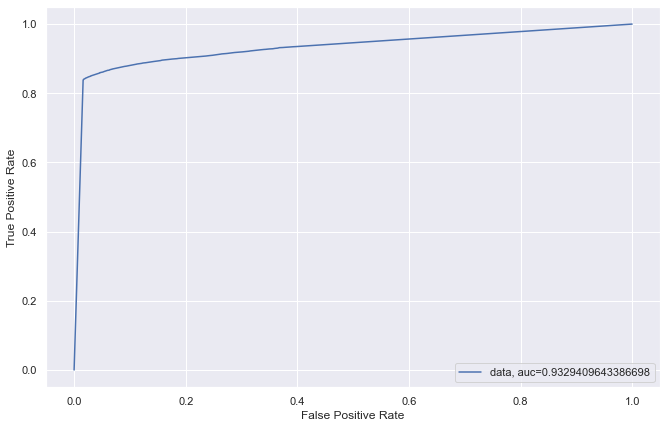

In [180]:
#Plotting ROC curve.
plotROCcurve(dt,X_test,y_test)

#### AUC is 0.93 which is good for our model but slightly less than previous model.

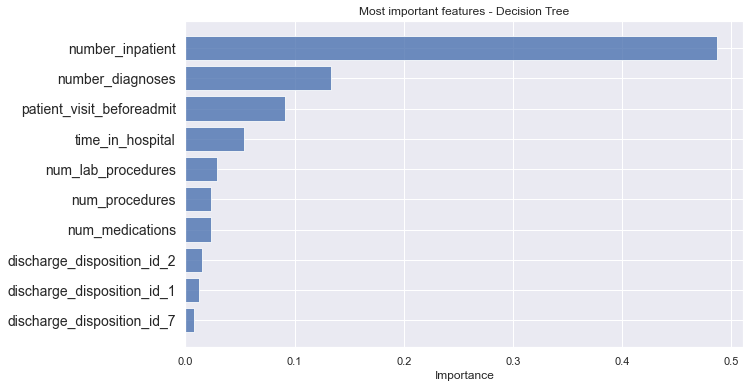

In [181]:
#Finding important features with new model.
most_imp_features = pd.DataFrame([f for f in zip(X_train.columns,dt.feature_importances_)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
plotimpFeature(most_imp_features,"Most important features - Decision Tree")

#### Features like 'number_inpatient' and 'number_diagnoses' are the most important features in our analysis.
#### 'patient_visit_beforeadmit' is the feature we created, also comes out to be important feature.
#### Apart from these, 'time_in_hospital' and 'num_lab_procedures' are also important. Discharge_disposition_id_2 means discharged to another short term hospital and this model recognises it as important.

### Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

#creating random forest model
rf = RandomForestClassifier(n_estimators = 100, max_depth=30, criterion = "gini", min_samples_split=10)
rf.fit(X_train, y_train)
#finding predicted y data
y_pred = rf.predict(X_test)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))


Training accuracy: 0.9672575209984409
Test accuracy: 0.9303060784595488


[[16938   254]
 [ 2171 15432]]


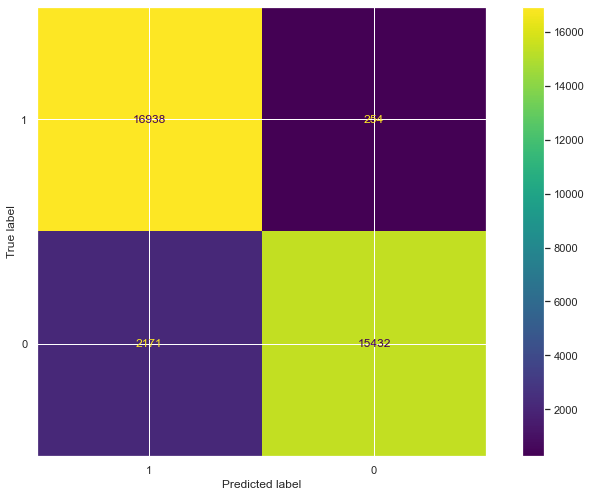

TPR:  0.9852256863657515
FPR:  0.12333125035505312
TNR:  0.8766687496449469
FNR:  0.014774313634248488
Accuracy is 0.93
precision:  0.9350979146609397
Recall:  0.9309472180053492
              precision    recall  f1-score   support

           1       0.89      0.99      0.93     17192
           0       0.98      0.88      0.93     17603

    accuracy                           0.93     34795
   macro avg       0.94      0.93      0.93     34795
weighted avg       0.94      0.93      0.93     34795



In [183]:
#create confusion matrix  and print performance measures.
createConfusionMatrix(X_test,y_test,rf)

#### FPR is more lowered and TPR is improved in this model. TNR now also improved to 0.87.
#### TPR has decreased in this model as compared to Decision Tree. This model has good measures.
#### Accuracy, Reacll and Precision are best in this model till now.

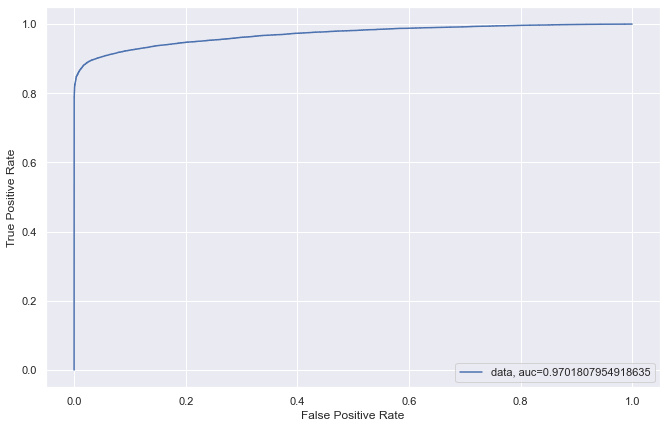

In [184]:
#Plotting ROC curve.
plotROCcurve(rf,X_test,y_test)

### AUC is increased to 0.97 which is more than previous models. Overall, Random Forest has good performance measures and highest AUC. We can optimise its parameters for more better results and good prediction. We can also do cross validation to make sure model is not overfitting and uses all the records effectively.

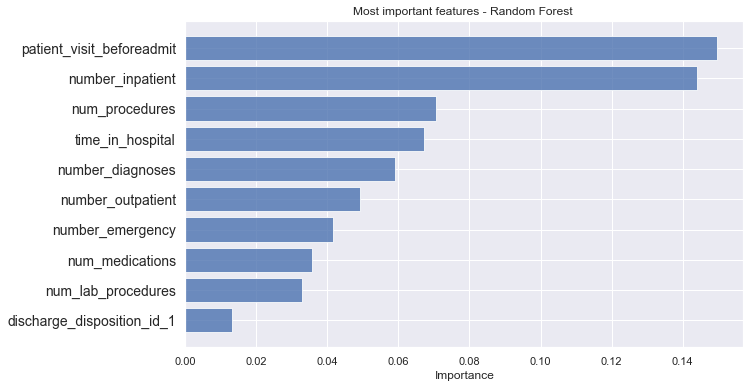

In [185]:
#Finding important features with new model.
most_imp_features = pd.DataFrame([f for f in zip(X_train.columns,rf.feature_importances_)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
plotimpFeature(most_imp_features,"Most important features - Random Forest ")

#### Features like 'number_inpatient' and 'patient_visit_beforeadmit' are the most important features in our analysis.
#### 'patient_visit_beforeadmit' is the feature we created, also comes out to be important feature.
#### Apart from these, 'time_in_hospital' and 'num_procedures' are also important. Discharge_disposition_id_1 means discharged to home and this model recognises it as important.

### To check if model is not overfitting and effective use of all available samples, we do KFold cross validation.

In [186]:
from sklearn.model_selection import KFold, cross_val_score

#Using Number of kfolds=5, we detemine accuracy.
kf = KFold(n_splits = 5)
score = cross_val_score(rf,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92818652 0.92613881 0.9239806  0.92735764 0.92286689]
Average Cross Validation score :0.9257060943033297


### We can observe from the KFold cross validation scores that Accuracys are all close to each other. Hence, our model is not overfitting.
### To improve our model more we can do hyperparameter tuning using RandomizedCV.

In [187]:
from sklearn.model_selection import RandomizedSearchCV

#We focus on 3 main parameters. Create a dictionary and store the different values of parameters.
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_depth'] = [20, 25, 30]
space['min_samples_split']=[8,10,12]

rf = RandomForestClassifier(criterion = "gini")
# Random search across 25 candidates, using 5 fold cross validation and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = space, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# fit on the traing data.
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 25, 30],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [10, 100, 500]},
                   random_state=42, verbose=2)

In [188]:
#print the best parameters obtained
print(rf_random.best_params_)

{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 30}


### Create new Random Forest Model based on the optimised parameters

In [189]:
#creating new random forest model using optimised parameters
rf_opt = RandomForestClassifier(n_estimators = 500, max_depth=30, criterion = "gini", min_samples_split=8)
rf_opt.fit(X_train, y_train)
#finding predicted y data
y_pred = rf_opt.predict(X_test)
print('Training accuracy:', rf_opt.score(X_train, y_train))
print('Test accuracy:', rf_opt.score(X_test, y_test))

Training accuracy: 0.9732139649511055
Test accuracy: 0.9337835895962063


[[16989   203]
 [ 2101 15502]]


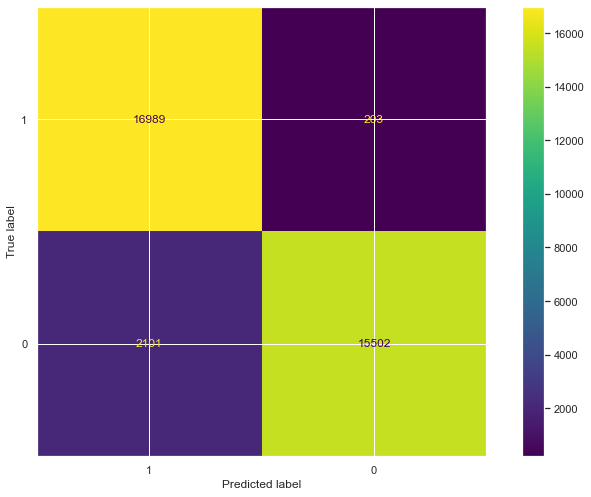

TPR:  0.9881921824104235
FPR:  0.11935465545645628
TNR:  0.8806453445435437
FNR:  0.011807817589576547
Accuracy is 0.93
precision:  0.9385082792029378
Recall:  0.9344187634769836
              precision    recall  f1-score   support

           1       0.89      0.99      0.94     17192
           0       0.99      0.88      0.93     17603

    accuracy                           0.93     34795
   macro avg       0.94      0.93      0.93     34795
weighted avg       0.94      0.93      0.93     34795



In [190]:
#create confusion matrix  and print performance measures.
createConfusionMatrix(X_test,y_test,rf_opt)

#### FPR is more lowered to 0.11. TNR is also improved to 0.88.
#### TPR is increased using these parameters. Precision and Recall are improved slightly.

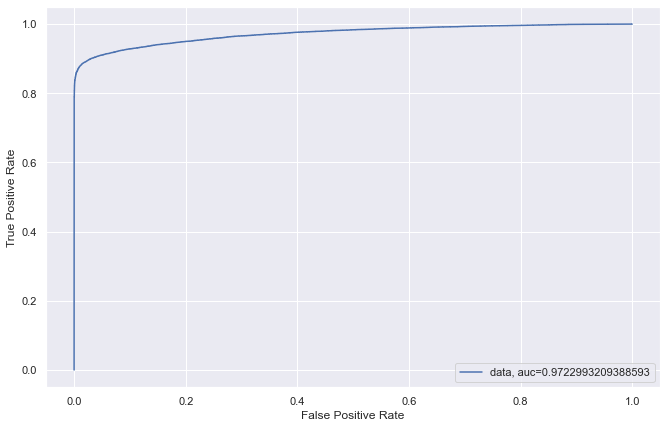

In [191]:
#Plotting ROC curve.
plotROCcurve(rf_opt,X_test,y_test)

#### AUC is increased to 0.97 which is similar to previous random forest model.

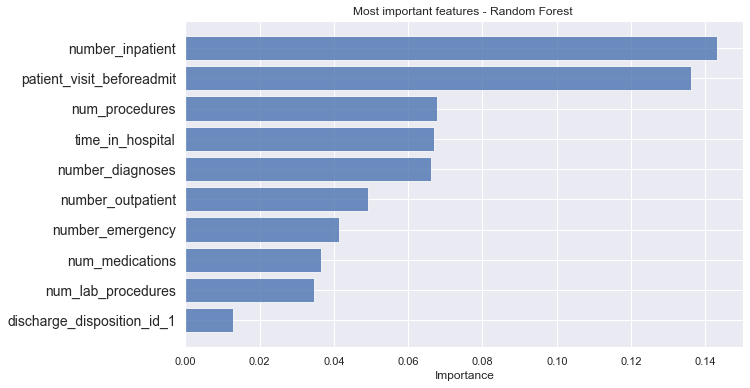

In [192]:
#Finding important features with new model.
most_imp_features = pd.DataFrame([f for f in zip(X_train.columns,rf_opt.feature_importances_)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
plotimpFeature(most_imp_features,"Most important features - Random Forest ")

#### Important features found in the optimised model are same as previous Random Forest model.
### Important features in Decision Tree and Random forest are more common. Discharde_Disposition_id 1,2,7 and 11 are important.
### Number of procedues, lab procedures, medications, time in hospital, number of visists of patient before admitting in previous year- All these are important features.

## Model Comparison

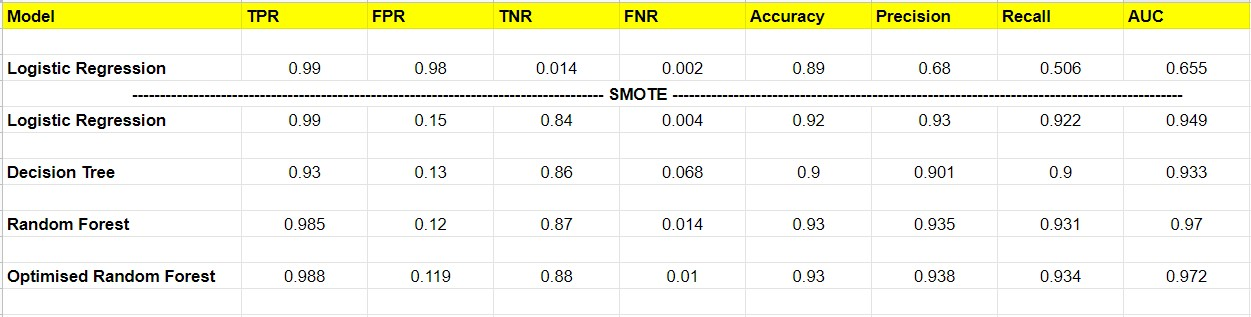

### Our first Logistic Regression model gave very high FPR and low TNR. AUC value is also low. There was class imbalance problem. We fixed the issue using SMOTE.  
### The improved Logistic Regression model have TPR of 0.99 and low FPR. TNR is also increased to 0.84. AUC value is also good 0.94. So, the model is good. We explored other models also to find the best model suited. Decision Tree has comparatively slightly less performance measures to Logistic Regression. Its TPR value is less than 0.99 and FNR has increased. AUC is slightly less. But, FPR is decreased in Decision tree. Random Forest has least FPR and good TNR.  Its TPR value is slightly less than Logistic Regression model's value. But it has high AUC value. So, we try to optimise Random Forest and observe that FPR and FNR are slightly decreased. TPR is also similar to Logistic Regression and TNR is highest. We get the best Accuracy, Precision and Recall with optimised Random Forest.
### Logistic Regression has best TPR value, but there is a tradeoff between model complexity and accuracy. If we can compromise on FPR and TNR then Logistic Regression is good but if we choose Random Forest, we get better performance, Accuracy, although it is computationally costly.
### We want to predict the patients getting readmitted in 30 days to understand the burden on US healthcare system. In this case, Recall score is an effective measure. It finds True Positives from the actual postive class. Not capturing even 1 case of readmitted in 30 days can affect the planning. It is more preferable to not miss any patient who will be readmitted in 30 days even if that means predicting some patients as positive (readmitted within 30days) but actually they are negative (will not be readmitted in 30 days). 
### The optimised Random Forest has best Precision and Recall. Its has good Accuracy, TPR is almost equal to logistic Regression and also FPR is least. 

